In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


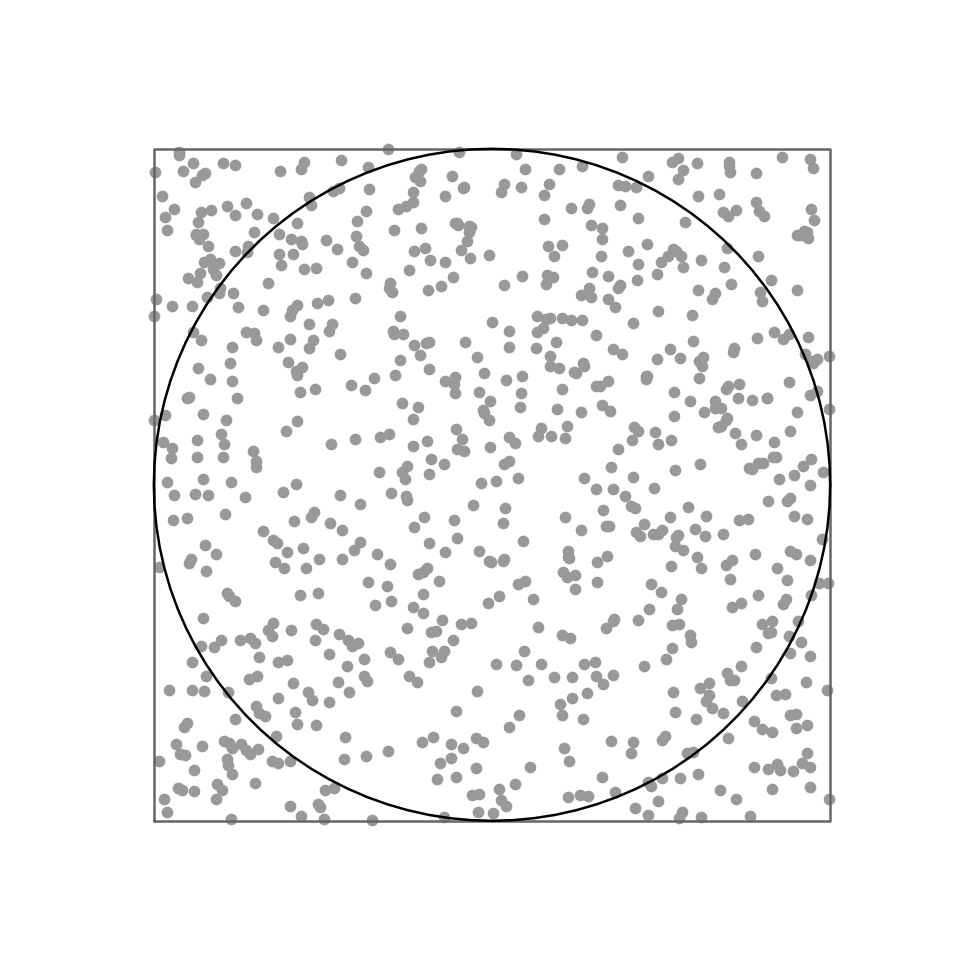

Animation done.


In [15]:
# Definiere Kreisfläche
res = 0.01
t = np.arange(0,1 +res , res)
kx = np.cos(2 * np.pi * t)
ky = np.sin(2 * np.pi * t)
# Nähere die Fläche durch ein größeres Quadrat an
qx = [-1,1,1,-1,-1]
qy = [-1,-1,1,1,-1]
# generie zufällige Punkte in diesem Quadrat
samples = 1000
sx = []
sy = []
for _ in range(samples):
    sx.append(np.random.rand(1)*2 - 1)
    sy.append(np.random.rand(1)*2 - 1)
    
# Zeige die Darstellung
plt.style.use("default")
plt.style.use("seaborn-dark")
plt.style.use("grayscale")
fig, ax = plt.subplots(figsize=(8,8),dpi=120) #figsize=(7,7)
fig.patch.set_facecolor('white')
fig.canvas.set_window_title('Skyhook')
plt.xticks([])
plt.yticks([])

Kreis = plt.plot(kx,ky, zorder=20)
Quadrat = plt.plot(qx,qy)
Samples, = ax.plot(sx,sy, "o", zorder=0)

# Animiere den Prozess
def animate(i):
    # Datenupdate
    Samples.set_data(sx[:i],sy[:i])
    # Zeittextupdate
    #time_text.set_text(time_template % i)

anim = animation.FuncAnimation(fig, animate, 
        frames=samples, interval=1)
print("Animation done.")
plt.show()

In [16]:
# Zähle die Anzahl der Punkte im Kreis
KreisCount = 0
ViereckCount = 0

for p in sy:
    x_2 = sx[sy.index(p)]
    abs_y_2 = math.sqrt(1 - x_2 * x_2)
    
    if p >= 0:
        if p >= abs_y_2:
            ViereckCount += 1
        else:
            KreisCount += 1
    else:
        if p <= -abs_y_2:
            ViereckCount += 1
        else:
            KreisCount += 1

# Werte durch das ausgezöhlte Verhöltnis aus,
# wie groß der Anteil des Quadreates an dem Viereck ist.
Kreisfläche = (KreisCount / (ViereckCount+KreisCount)) * 4
print(Kreisfläche)

3.152


In [17]:
#anim.save('Abb_1.anim.gif', dpi=40, writer='imagemagick', fps=60)
anim.save('Abb_1_anim.mp4', writer='ffmpeg', fps=60, bitrate=1800)